# **Tercera preentrega - Aprendizaje supervisado**

# Curso Data Science INGENIAS

## Integrantes

   * Cristina Betancur
   * Melani Caucota
   * Virginia Chirilá

## Objetivo

Con este trabajo planemos generar conocimiento para mejorar la toma de decisiones con respecto a la población de la Ciudad Autónoma de Buenos Aires (CABA). Para esto, desde la perspectiva de un tomador de decisiones, generamos preguntas de interés social, sanitario, económico y demográfico, las cuales trataremos de resolver valiéndonos de datos generados por la encuesta anual de hogares de CABA y tomando como unidad de estudio a las personas. En particular, buscamos estudiar los ingresos económicos de las personas y el uso del sistema de salud público.
   * Con respecto al uso del sistema de salud público, planteamos estudiar la probabilidad de que una persona se atienda en sistema de salud privado o público en base a características demográficas como la edad y el sexo, ocupacionales como si vive o no en barrios vulnerables; laborales como el estado ocupacional actual; educativas como el nivel máximo educativo o los años de escolaridad y de natalidad como la cantidad de hijos. 
   * Con respecto al ingreso económico planteamos estudiar cómo variables demográficas y socio-económicas como las descriptas arriba para el estudio del uso del sistema de salud pueden influir en el nivel de ingreso de una persona. 

# Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.model_selection import train_test_split # para dividir datos

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# para entrenar modelo de regresion lineal
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import ConfusionMatrixDisplay

In [4]:
from sklearn.tree import DecisionTreeRegressor
# para arboles de decision

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [6]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [8]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score
)

In [10]:
from collections import Counter
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm


In [11]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Data set

In [12]:
datos = pd.read_csv("encuesta-anual-hogares-2019-transf.csv", delimiter=',')

#### Hacemos un subset con solo los adultos

In [13]:
datosadultos = datos[datos["edad"]>=18]

# Procesamiento de datos previo

Pegar link aquí

# Categorías de las variables categóricas

Variable: **dominio**   
    Categorías: {'Resto de la Ciudad': 0, 'Villas de emergencia': 1}   

Variable: **situacion_conyugal**     
    Categorías: {'Casado/a': 0, 'Divorciado/a': 1, 'No corresponde': 2, 'Separado/a de unión o matrimonio': 3, 'Soltero/a': 4, 'Unido/a': 5, 'Viudo/a': 6}   

Variable: **estado_ocupacional**   
    Categorías: {'Desocupado': 0, 'Inactivo': 1, 'Ocupado': 2}

Variable: **cat_ocupacional**   
    Categorías: {'Asalariado': 0, 'No corresponde': 1, 'Patron/empleador': 2, 'Trabajador familiar': 3, 'Trabajador por cuenta propia': 4}

Variable: **calidad_ingresos_lab**   
    Categorías: {'No corresponde': 0, 'No tuvo ingresos': 1, 'Tuvo ingresos pero no declara monto': 2, 'Tuvo ingresos y declara monto': 3}

Variable: **calidad_ingresos_no_lab**   
    Categorías: {'No corresponde': 0, 'No tuvo ingresos': 1, 'Tuvo ingresos pero no declara monto': 2, 'Tuvo ingresos y declara monto': 3}

Variable: **parentesco_jefe**   
    Categorías: {'Conyugue o pareja': 0, 'Hijo/a - Hijastro/a': 1, 'Jefe': 2, 'Nieto/a': 3, 'Otro familiar': 4, 'Otro no familiar': 5, 'Padre/Madre/Suegro/a': 6, 'Servicio domestico y sus familiares': 7, 'Yerno/nuera': 8}

Variable: **calidad_ingresos_totales**   
    Categorías: {'No corresponde': 0, 'No tuvo ingresos': 1, 'Tuvo ingresos pero no declara monto': 2, 'Tuvo ingresos y declara monto': 3}

Variable: **calidad_ingresos_familiares**   
    Categorías: {'No tuvo ingresos': 0, 'Tuvo ingresos pero no declara monto': 1, 'Tuvo ingresos y declara monto': 2}

Variable: **estado_educativo**   
    Categorías: {'Asiste': 0, 'No asiste pero asistió': 1, 'Nunca asistio': 2}
   
Variable: **sector_educativo**   
    Categorías: {'Estatal/publico': 0, 'No corresponde': 1, 'Privado no religioso': 2, 'Privado religioso': 3}
   
Variable: **nivel_actual**   
    Categorías: {'Jardin maternal': 0, 'No corresponde': 1, 'Otras escuelas especiales': 2, 'Postgrado': 3, 'Primario adultos': 4, 'Primario comun': 5, 'Primario especial': 6, 'Sala de 3': 7, 'Sala de 4': 8, 'Sala de 5': 9, 'Secundario/medio adultos': 10, 'Secundario/medio comun': 11, 'Terciario/superior no universitario': 12, 'Universitario': 13}

Variable: **nivel_max_educativo**   
    Categorías: {'EGB (1° a 9° año)': 0, 'Otras escuelas especiales': 1, 'Primario comun': 2, 'Primario especial': 3, 'Sala de 5': 4, 'Secundario/medio comun': 5, 'Todavía no alcanzó ninguno': 6}

Variable: **afiliacion_salud**   
    Categorías: {'Otros': 0, 'Solo obra social': 1, 'Solo plan de medicina prepaga por contratación voluntaria': 2, 'Solo prepaga o mutual via OS': 3, 'Solo sistema publico': 4}

Variable: **lugar_nacimiento**    
    Categorías: {'CABA': 0, 'Otra provincia': 1, 'PBA excepto GBA': 2, 'PBA sin especificar': 3, 'Pais limitrofe': 4, 'Pais no limitrofe': 5, 'Partido GBA': 6}

## Primer objetivo: predecir si una persona utiliza el sistema de salud público o el privado

### Seleccion de target (y) y variables (X)

In [14]:
#Selección de la variable objetivo
y = datosadultos['sist_de_salud_Sistema público']

#Selección de las variables predictoras
x = datosadultos[[ 'dominio', 'edad',
       'parentesco_jefe', 'situacion_conyugal', 
       'estado_ocupacional', 'cat_ocupacional', 'nivel_max_educativo', 'años_escolaridad',
       'lugar_nacimiento', 'cantidad_hijos_nac_vivos', 'hijos_nacidos_vivos_Si', 
       'ingresos_totales_USD','sexo_Mujer']]

### Separando Train /Test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Random Forest

In [16]:
#### Entrenar modelo

In [17]:
# Crear y entrenar el modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predecir con el modelo Random Forest
y_pred_rf = rf.predict(X_test)

# cero =  cobertura
# 1 = sistema publico

# Evaluación del modelo Random Forest
print("Evaluación del modelo Random Forest")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))

# Importancia de las características
importances = rf.feature_importances_
feature_names = x.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)

Evaluación del modelo Random Forest
Confusion Matrix:
 [[1731   98]
 [ 189  233]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92      1829
           1       0.70      0.55      0.62       422

    accuracy                           0.87      2251
   macro avg       0.80      0.75      0.77      2251
weighted avg       0.86      0.87      0.87      2251

Accuracy Score: 0.8725011106175034
Feature Importances:
 ingresos_totales_USD        0.219952
edad                        0.191550
dominio                     0.105630
años_escolaridad            0.099764
lugar_nacimiento            0.079358
situacion_conyugal          0.064326
nivel_max_educativo         0.053685
parentesco_jefe             0.049615
cat_ocupacional             0.041121
cantidad_hijos_nac_vivos    0.033767
estado_ocupacional          0.029569
sexo_Mujer                  0.020087
hijos_nacidos_vivos_Si      0.011576
dtype: float64


**RANDOM FOREST**
**Matriz de confusión**:
Interpretación:
- 1731 (Verdaderos Negativos): Casos donde el modelo predijo correctamente el sistema privado de salud.
- 98 (Falsos Positivos): Casos donde el modelo predijo el sistema privado, pero en realidad era público.
- 189 (Falsos Negativos): Casos donde el modelo predijo el sistema público, pero en realidad era privado.
- 233 (Verdaderos Positivos): Casos donde el modelo predijo correctamente el sistema público de salud.


**Precisión**: proporción  de verdaderos positivos sobre el total de predicciones positivas.
- sistema privado (0): 0.90 -> El 90% de las veces que el modelo predice sistema privado, es correcto.  
- sistema público (1): 0.70 -> El 70% de las veces que el modelo predice sistema público, es correcto.  

**Recall**: proporción de verdaderos positivos sobre el total de verdaderos positivos y falsos negativos.
- sistema privado (0): 0.95 -> El 95% de las personas que realmente usan el sistema privado son correctamente identificadas.
- sistema público (1): 0.55 -> El 55% de las personas que realmente usan el sistema público son correctamente identificadas.

**F1-score**: media armónica de la precisión y el recall.
- sistema privado (0): 0.92
- sistema público (1): 0.62

**support**: número de ocurrencias de cada clase en los datos de prueba.
- sistema privado (0): 1829
- sistema público (1): 422

**Precisión general (accuracy score)**: el modelo clasifica correctamente el 87.25% de las observaciones en el conjunto de prueba. En otras palabras, de cada 100 personas, aproximadamente 87 son clasificadas correctamente como usuarios del sistema público o privado de salud. El modelo tiene un buen rendimiento en general. 

**Feature Importances:**

- ingresos_totales_USD: 0.2199. El ingreso total en USD es la característica más importante, contribuyendo con un 21.99% a las decisiones del modelo. Esto sugiere que el nivel de ingresos es un factor clave para determinar si una persona utiliza el sistema de salud público o privado.
- edad: 0.1916. La edad es la segunda característica más importante, con una contribución del 19.16%. Esto indica que la edad de la persona también juega un papel significativo en la predicción del sistema de salud que utiliza.  
- dominio: 0.1056. El dominio donde vive una persona (villa de emergencia o resto de CABA) tiene una contribución del 10.6%, lo que también refleja el papel de la vulnerabilidad social en la elección del sistema de salud.
- años_escolaridad: 0.0998.  Los años de escolaridad son la tercera característica más importante, contribuyendo con un 9.9%. La educación puede estar correlacionada con el acceso y preferencia por el sistema de salud.
- lugar_nacimiento:   0.0793. El lugar de nacimiento contribuye con un 7.93%. Esto podría estar relacionado con la idiosincracia sobre la atención pública derivada de la cultuta del lugar de origen o sobre la imposibilidad de acceder al sistema privado mediante obra social por la calidad de inmigrante.
- situacion_conyugal: 0.0643. La situación conyugal contribuye con un 6.43%, indicando que el estado civil puede influir en la elección del sistema de salud.

Las demás características tienen una menor influencia, pero aún pueden ser relevantes para las predicciones del modelo.


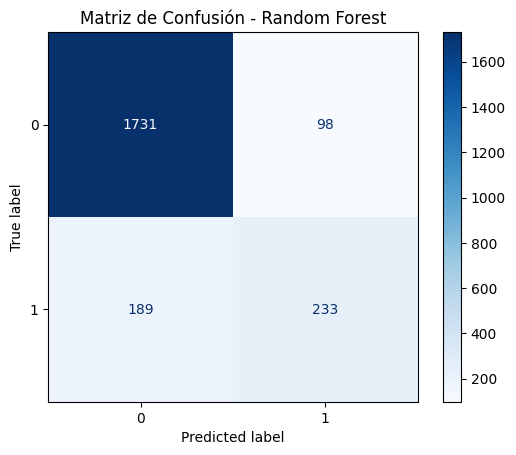

In [18]:
# Matriz de Confusión para Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - Random Forest')
plt.show()


In [19]:
clases = ["Sistema privado", "Sistema público"]
sistprivado= 1735+94
sistpublico= 173+249
total= 1735+94+173+249
suport = [sistprivado, sistpublico]

In [20]:
#Sistema privado porcentaje de instancias con respecto al total
sistprivado/total

0.8125277654375833

In [21]:
#Sistema publico porcentaje de instancias con respecto al total
sistpublico/total

0.1874722345624167

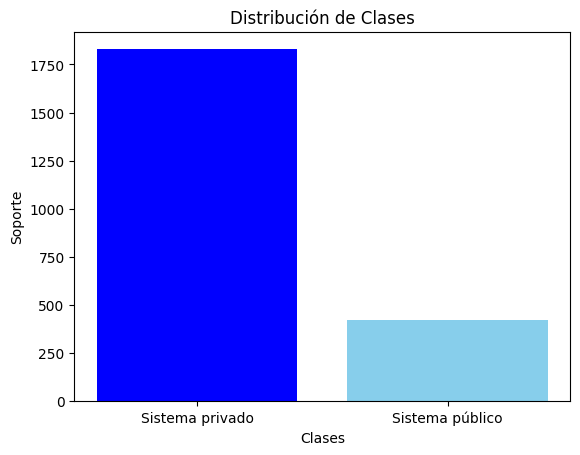

In [22]:
plt.bar(clases, suport, color=['blue', 'skyblue'])
plt.xlabel('Clases')
plt.ylabel('Soporte') # support
plt.title('Distribución de Clases')
plt.show()

Posible overfitting favoreciendo a sistema privado por desbalance de clases

Tenemos 1829 instancias de "Sistema privado" y 422 instancias de "Sistema público", lo que muestra un desbalance.
Se podria hacer un sobremuestreo de la clase minoritaria y submuestreo de la clase mayoritaria o generar de datos sintéticos (SMOTE). 

## SMOTE Random Forest

In [23]:
smote = SMOTE(random_state=42)

# Aplicar SMOTE para balancear las clases en el conjunto de entrenamiento
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Distribución de clases antes de SMOTE:", y_train.value_counts())
print("Distribución de clases después de SMOTE:", pd.Series(y_train_smote).value_counts())


Distribución de clases antes de SMOTE: sist_de_salud_Sistema público
0    7263
1    1740
Name: count, dtype: int64
Distribución de clases después de SMOTE: sist_de_salud_Sistema público
0    7263
1    7263
Name: count, dtype: int64


In [24]:
# Crear el clasificador Random Forest
clf = RandomForestClassifier(random_state=42)

# Entrenar el clasificador con los datos balanceados
clf.fit(X_train_smote, y_train_smote)

# Predecir las etiquetas para el conjunto de prueba
y_pred = clf.predict(X_test)

In [25]:
# Evaluar el rendimiento del modelo
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
# Importancia de las características
importances = clf.feature_importances_
feature_names = x.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)

Confusion Matrix:
[[1652  177]
 [ 135  287]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1829
           1       0.62      0.68      0.65       422

    accuracy                           0.86      2251
   macro avg       0.77      0.79      0.78      2251
weighted avg       0.87      0.86      0.86      2251

Accuracy Score: 0.8613949355841848
Feature Importances:
 ingresos_totales_USD        0.211306
edad                        0.184038
años_escolaridad            0.145483
nivel_max_educativo         0.100740
lugar_nacimiento            0.082559
situacion_conyugal          0.075880
cat_ocupacional             0.042768
estado_ocupacional          0.041397
parentesco_jefe             0.038074
cantidad_hijos_nac_vivos    0.023467
sexo_Mujer                  0.023334
dominio                     0.021477
hijos_nacidos_vivos_Si      0.009478
dtype: float64


**RANDOM FOREST SMOTE**
**Matriz de confusión**:
Interpretación:
- 1652 (Verdaderos Negativos): Casos donde el modelo predijo correctamente el sistema privado de salud.
- 177 (Falsos Positivos): Casos donde el modelo predijo el sistema privado, pero en realidad era público.
- 135 (Falsos Negativos): Casos donde el modelo predijo el sistema público, pero en realidad era privado.
- 287 (Verdaderos Positivos): Casos donde el modelo predijo correctamente el sistema público de salud.


**Precisión**: proporción  de verdaderos positivos sobre el total de predicciones positivas.
- sistema privado (0): 0.92 -> El 92% de las veces que el modelo predice sistema privado, es correcto.  
- sistema público (1): 0.62 -> El 62% de las veces que el modelo predice sistema público, es correcto.  

**Recall**: proporción de verdaderos positivos sobre el total de verdaderos positivos y falsos negativos.
- sistema privado (0): 0.90 -> El 90% de las personas que realmente usan el sistema privado son correctamente identificadas.
- sistema público (1): 0.68 -> El 68% de las personas que realmente usan el sistema público son correctamente identificadas.

**F1-score**: media armónica de la precisión y el recall.
- sistema privado (0): 0.91
- sistema público (1): 0.65

**support**: número de ocurrencias de cada clase en los datos de prueba.
- sistema privado (0): 1829
- sistema público (1): 422

**Precisión general (accuracy score)**: el modelo clasifica correctamente el 86.14% de las observaciones en el conjunto de prueba. En otras palabras, de cada 100 personas, aproximadamente 86 son clasificadas correctamente como usuarios del sistema público o privado de salud. El modelo tiene un buen rendimiento en general. 

**Feature Importances:**
- ingresos_totales_USD: 0.2113. El ingreso total en USD es la característica más importante, contribuyendo con un 21.13% a las decisiones del modelo. Esto sugiere que el nivel de ingresos es un factor clave para determinar si una persona utiliza el sistema de salud público o privado.
- edad: 0.1840. La edad es la segunda característica más importante, con una contribución del 18.40%. Esto indica que la edad de la persona también juega un papel significativo en la predicción del sistema de salud que utiliza.
- años_escolaridad: 0.1454.  Los años de escolaridad son la tercera característica más importante, contribuyendo con un 14.54%. La educación puede estar correlacionada con el acceso y preferencia por el sistema de salud.
- nivel_max_educativo: 0.1007. El nivel máximo educativo tiene una contribución del 10%, lo que también refleja la importancia de la educación en la predicción del sistema de salud.
- lugar_nacimiento: 0.0825. El lugar de nacimiento contribuye con un 8.25%. Esto podría estar relacionado con la idiosincracia sobre la atención pública derivada de la cultuta del lugar de origen o sobre la imposibilidad de acceder al sistema privado mediante obra social por la calidad de inmigrante.
- situacion_conyugal: 0.0758. La situación conyugal contribuye con un 7.58%, indicando que el estado civil puede influir en la elección del sistema de salud.

Las demás características tienen una menor influencia, pero aún pueden ser relevantes para las predicciones del modelo.


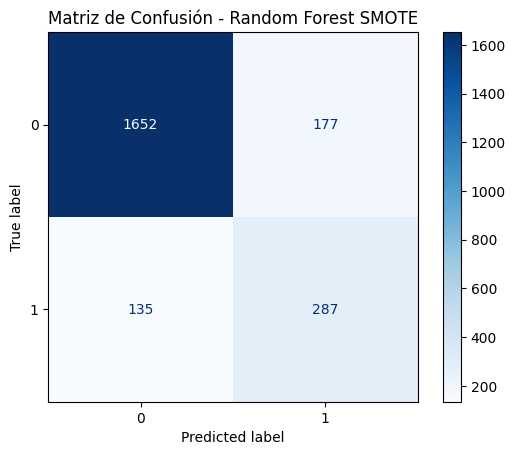

In [26]:
# Matriz de Confusión para Random Forest
cm_rf = confusion_matrix(y_test, y_pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - Random Forest SMOTE')
plt.show()

## KNN

In [27]:
# Crear y entrenar el modelo Random Forest
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predecir con el modelo Random Forest
y_pred_knn = knn.predict(X_test)

# cero =  cobertura
# 1 = sistema publico

# Evaluación del modelo Random Forest
print("Evaluación del modelo KNN")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Accuracy Score:", accuracy_score(y_test, y_pred_knn))

Evaluación del modelo KNN
Confusion Matrix:
 [[1706  123]
 [ 211  211]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      1829
           1       0.63      0.50      0.56       422

    accuracy                           0.85      2251
   macro avg       0.76      0.72      0.73      2251
weighted avg       0.84      0.85      0.84      2251

Accuracy Score: 0.8516215015548645


### Ajuste de hiperparámetros KNN

Evaluamos cómo cambia el rendimiento del clasificador KNN al variar el número de vecinos. Utilizamos los resultados para seleccionar el número óptimo de vecinos para el clasificador.

In [28]:
ACC_train = []
ACC_test = []
vecinos = [1, 3, 5, 10, 15, 20, 25, 30]
for n in vecinos:
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    ACC_train.append(train_acc)
    y_test_pred = clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    ACC_test.append(test_acc)

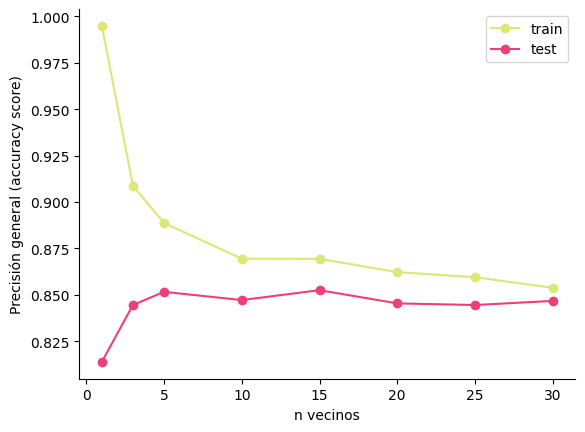

In [29]:
plt.plot(vecinos,ACC_train,'o-',label='train', color='#DCE775')
plt.plot(vecinos,ACC_test,'o-',label='test', color='#EC407A')
plt.xlabel('n vecinos')
plt.ylabel('Precisión general (accuracy score)')
plt.legend()
sns.despine();

In [30]:
#Elejimos 20,25 y 30 como mejores vecinos
# Valores para los parametros a optimizar
param_grid_vec = {
    'n_neighbors': [20, 25, 30],
    'weights': ['uniform','distance'],
    'metric': ['euclidean', 'manhattan'],
}

In [31]:
# Definir el estimador kNN
knn_search = KNeighborsClassifier()

In [32]:
# Configurar GridSearchCV
vecinos_search = GridSearchCV(estimator=knn_search, param_grid=param_grid_vec,
                         cv=3, verbose=2, n_jobs=-1)

In [33]:
vecinos_search.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [20, 25, 30],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [34]:
# Mejores hiperparametros
vecinos_search.best_params_

{'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}

In [35]:
knn_best = KNeighborsClassifier(metric='manhattan', n_neighbors=23, weights='distance')

In [36]:
#Ajustamos modelo con mejoresd hiperparámetros
knn_best.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=23, weights='distance')

In [37]:
new_predictions = knn_best.predict(X_test)

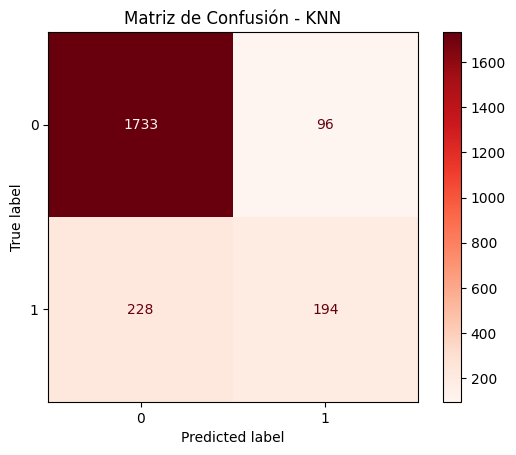

In [38]:
random_confusion = confusion_matrix(y_test, new_predictions)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=random_confusion)
disp_rf.plot(cmap=plt.cm.Reds)
plt.title('Matriz de Confusión - KNN')
plt.show()

In [39]:
# Evaluación del modelo KNN
print("Evaluación del modelo KNN")
print("Confusion Matrix:\n", confusion_matrix(y_test,  new_predictions))
print("Classification Report:\n", classification_report(y_test,  new_predictions))
print("Accuracy Score:", accuracy_score(y_test,  new_predictions))

Evaluación del modelo KNN
Confusion Matrix:
 [[1733   96]
 [ 228  194]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      1829
           1       0.67      0.46      0.54       422

    accuracy                           0.86      2251
   macro avg       0.78      0.70      0.73      2251
weighted avg       0.84      0.86      0.85      2251

Accuracy Score: 0.8560639715681919


**KNN**   
**Matriz de confusión**:
Interpretación:
- 1733 (Verdaderos Negativos): Casos donde el modelo predijo correctamente el sistema privado de salud.
- 96 (Falsos Positivos): Casos donde el modelo predijo el sistema privado, pero en realidad era público.
- 228 (Falsos Negativos): Casos donde el modelo predijo el sistema público, pero en realidad era privado.
- 194 (Verdaderos Positivos): Casos donde el modelo predijo correctamente el sistema público de salud.

**Precisión**: proporción  de verdaderos positivos sobre el total de predicciones positivas.
- sistema privado (0): 0.88 -> El 88% de las veces que el modelo predice sistema privado, es correcto.  
- sistema público (1): 0.67 -> El 67% de las veces que el modelo predice sistema público, es correcto.  

**Recall**: proporción de verdaderos positivos sobre el total de verdaderos positivos y falsos negativos.
- sistema privado (0): 0.95 -> El 95% de las personas que realmente usan el sistema privado son correctamente identificadas.
- sistema público (1): 0.46 -> El 46% de las personas que realmente usan el sistema público son correctamente identificadas.

**F1-score**: media armónica de la precisión y el recall.
- sistema privado (0): 0.91
- sistema público (1): 0.54

**support**: número de ocurrencias de cada clase en los datos de prueba.
- sistema privado (0): 1829
- sistema público (1): 422

**Precisión general (accuracy score)**: el modelo clasifica correctamente el 85.60% de las observaciones en el conjunto de prueba. En otras palabras, de cada 100 personas, aproximadamente 86 son clasificadas correctamente como usuarios del sistema público o privado de salud. El modelo tiene un buen rendimiento en general. 

## SMOTE KNN

Al igual que para el algoritmo de Random Forest las clases estan desbalanceadas, decidimos emplear SMOTE para estimar el modelo KNN de nuevo equilibrando la distribución de clases

In [40]:
smote = SMOTE(random_state=42)

# Aplicar SMOTE para balancear las clases en el conjunto de entrenamiento
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Distribución de clases antes de SMOTE:", y_train.value_counts())
print("Distribución de clases después de SMOTE:", pd.Series(y_train_smote).value_counts())


Distribución de clases antes de SMOTE: sist_de_salud_Sistema público
0    7263
1    1740
Name: count, dtype: int64
Distribución de clases después de SMOTE: sist_de_salud_Sistema público
0    7263
1    7263
Name: count, dtype: int64


In [41]:
# Crear el clasificador Random Forest
knnsm = KNeighborsClassifier(metric='manhattan', n_neighbors=23, weights='distance')

# Entrenar el clasificador con los datos balanceados
knnsm.fit(X_train_smote, y_train_smote)

# Predecir las etiquetas para el conjunto de prueba
y_pred = knnsm.predict(X_test)

In [42]:
# Evaluar el rendimiento del modelo
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[1525  304]
 [  87  335]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      1829
           1       0.52      0.79      0.63       422

    accuracy                           0.83      2251
   macro avg       0.74      0.81      0.76      2251
weighted avg       0.87      0.83      0.84      2251

Accuracy Score: 0.8262994224788983


**KNN SMOTE**   
**Matriz de confusión**:
Interpretación:
- 1525 (Verdaderos Negativos): Casos donde el modelo predijo correctamente el sistema privado de salud.
- 304 (Falsos Positivos): Casos donde el modelo predijo el sistema privado, pero en realidad era público.
- 87 (Falsos Negativos): Casos donde el modelo predijo el sistema público, pero en realidad era privado.
- 335 (Verdaderos Positivos): Casos donde el modelo predijo correctamente el sistema público de salud.

**Precisión**: proporción  de verdaderos positivos sobre el total de predicciones positivas.
- sistema privado (0): 0.95 -> El 95% de las veces que el modelo predice sistema privado, es correcto.  
- sistema público (1): 0.52 -> El 52% de las veces que el modelo predice sistema público, es correcto.  

**Recall**: proporción de verdaderos positivos sobre el total de verdaderos positivos y falsos negativos.
- sistema privado (0): 0.83 -> El 83% de las personas que realmente usan el sistema privado son correctamente identificadas.
- sistema público (1): 0.79 -> El 79% de las personas que realmente usan el sistema público son correctamente identificadas.

**F1-score**: media armónica de la precisión y el recall.
- sistema privado (0): 0.89
- sistema público (1): 0.63

**support**: número de ocurrencias de cada clase en los datos de prueba.
- sistema privado (0): 1829
- sistema público (1): 422

**Precisión general (accuracy score)**: el modelo clasifica correctamente el 82.63% de las observaciones en el conjunto de prueba. En otras palabras, de cada 100 personas, aproximadamente 83 son clasificadas correctamente como usuarios del sistema público o privado de salud. El modelo tiene un buen rendimiento en general. 

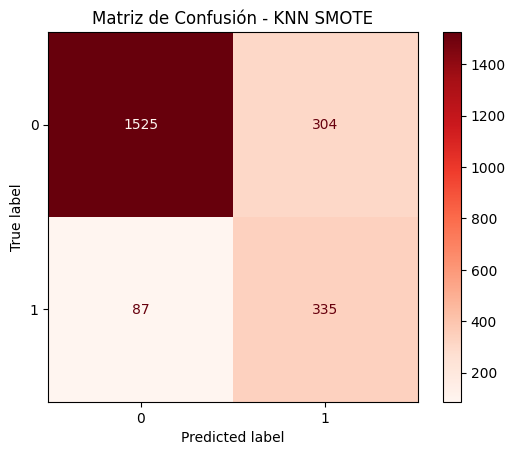

In [43]:
# Matriz de Confusión para KNN
cm_rf = confusion_matrix(y_test, y_pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap=plt.cm.Reds)
plt.title('Matriz de Confusión - KNN SMOTE')
plt.show()

## Evaluación curvas ROC -AUC de todos los modelos

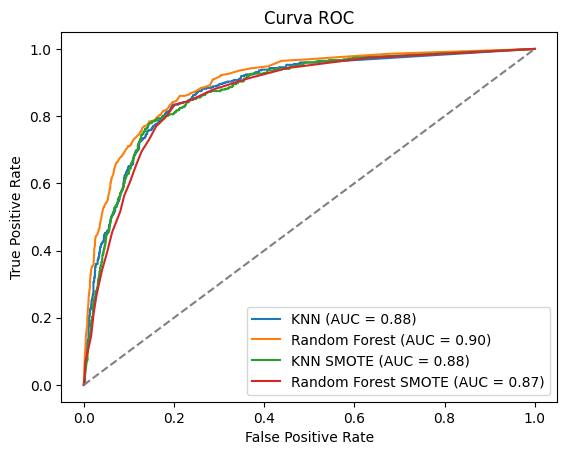

In [44]:
# Podemos evaluar la curva ROC -AUC

# Predecir con el modelo KNN
y_prob_knn_best = knn_best.predict_proba(X_test)[:, 1]  # Probabilidades para la curva ROC

# Predecir con el modelo Random Forest
y_prob_rf = rf.predict_proba(X_test)[:, 1]  # Probabilidades para la curva ROC

# Predecir con el modelo KNN
y_prob_knnsm = knnsm.predict_proba(X_test)[:, 1]  # Probabilidades para la curva ROC

# Predecir con el modelo Random Forest SMOTE
y_prob_clf = clf.predict_proba(X_test)[:, 1]  # Probabilidades para la curva ROC

# Curvas ROC y AUC
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn_best)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_knnsm, tpr_knnsm, _ = roc_curve(y_test, y_prob_knnsm)
fpr_clf, tpr_clf, _ = roc_curve(y_test,y_prob_clf)


auc_knn = roc_auc_score(y_test,  y_prob_knn_best)
auc_rf = roc_auc_score(y_test, y_prob_rf)
auc_knnsm = roc_auc_score(y_test, y_prob_knnsm)
auc_clf = roc_auc_score(y_test, y_prob_clf)

# Graficar las curvas ROC
plt.figure()
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_knnsm, tpr_knnsm, label=f'KNN SMOTE (AUC = {auc_knnsm:.2f})')
plt.plot(fpr_clf, tpr_clf, label=f'Random Forest SMOTE (AUC = {auc_clf:.2f})')
         
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.show()


## Conclusión

Debido a que existe un desbalance en las clases, decidimos tomar en cuenta los resultados de los modelos en los cuales se empleo SMOTE  
**Precisión General:** El modelo Random Forest SMOTE tiene una mayor precisión general que el modelo KNN SMOTE (86.14% vs. 82.63%).  
**Precisión y F1-score:** Para la clase del sistema público (1), el modelo Random Forest SMOTE supera al KNN SMOTE en precisión (0.62 vs. 0.52) y F1-score (0.65 vs. 0.63).  
**Recall:** Aunque el KNN SMOTE tiene un mejor recall para la clase del sistema público (1), el Random Forest SMOTE tiene un mejor recall para la clase del sistema privado (0).    
**Curvas ROC-AUC:** Podemos concluir a partir de los valores AUC y de las curvas ROC que la performance de los cuatro modelos para clasificar entre sistema público y privado es buena. Vemos sin embargo que el valor AUC del modelo Random Forest SMOTE (0.87) es ligeramente menor al del modelo KNN SMOTE (0.88)

*Dado que el modelo Random Forest SMOTE tiene una mayor precisión general y mejores resultados en precisión y F1-score para ambas clases, se puede concluir que el modelo Random Forest SMOTE es el mejor entre los dos. Este modelo proporciona un buen equilibrio entre precisión y recall, y es más fiable para clasificar correctamente ambos sistemas de salud.*

# Segundo objetivo: predecir el ingreso total

## Regresión Lineal

## Modelo 1 

In [45]:
#Selección de la variable objetivo
y = datosadultos['ingresos_totales_USD']

#Selección de las variables predictoras
x =  datosadultos[[ 'dominio', 'edad',
       'parentesco_jefe', 'situacion_conyugal', 
       'estado_ocupacional', 'cat_ocupacional', 'nivel_max_educativo', 'años_escolaridad',
       'lugar_nacimiento', 'cantidad_hijos_nac_vivos','hijos_nacidos_vivos_Si',
        'sexo_Mujer']]


In [46]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [47]:
# Ajustar el modelo de regresión lineal
mo = LinearRegression()
mo.fit(X_train, y_train)

LinearRegression()

In [48]:
# Hacer predicciones
y_train_pred = mo.predict(X_train) # subset de entrenamiento
y_test_pred = mo.predict(X_test) #subset de testeo

# Calcular los residuos
residuos = y_test - y_test_pred

## Evaluación del modelo 1 de regresión

In [49]:
# Métricas del modelo 
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print(f'Mean Squared Error: {round(mse,2)}')
print(f'R-squared: {round(r2,2)}')

# Métricas del modelo training
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)
print(f'Mean Squared Error train: {round(mse,2)}')
print(f'R-squared train: {round(r2,2)}')

Mean Squared Error: 246141.16
R-squared: 0.3
Mean Squared Error train: 256581.22
R-squared train: 0.29


In [50]:
# Obtenemos los componentes de nuestro regresor. A diferencia del regresor con un solo atributo, aquí tenemos dos pendientes
print('Las pendientes del modelo de regresión lineal son:', mo.coef_)
print('La ordenada al origen del modelo de regresión lineal es:', mo.intercept_)

Las pendientes del modelo de regresión lineal son: [ -36.73387522    6.84448109   18.35075128   -6.26215378  259.33259466
  -25.55338115   27.93603891   49.00191362   -5.84794745    6.88154875
  -44.64680036 -128.44448814]
La ordenada al origen del modelo de regresión lineal es: -814.8136694116366


<Figure size 1000x500 with 0 Axes>

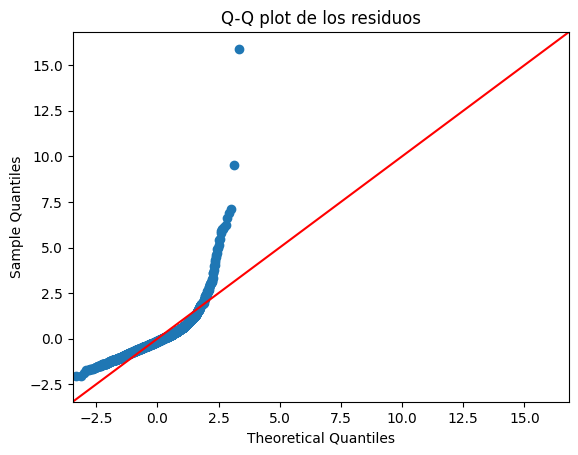

In [51]:
# Evaluar la normalidad con un Q-Q plot
plt.figure(figsize=(10, 5))
sm.qqplot(residuos, line='45', fit=True)
plt.title('Q-Q plot de los residuos')
plt.show()

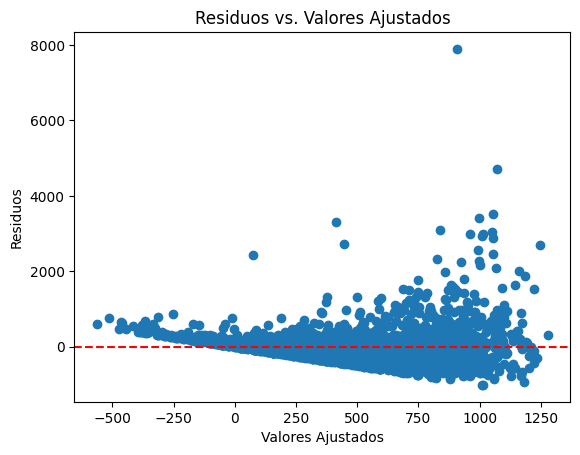

In [52]:
# Evaluar la homogeneidad de varianzas con un gráfico de residuos vs. valores ajustados
plt.scatter(y_test_pred, residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuos vs. Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.show()

C:\Users\Caucota\AppData\Local\Temp\ipykernel_10140\101886520.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_train_pred, bins = 20, label = 'train') # kde = True, para que nos grafique la curva de densidad de probabilidad
C:\Users\Caucota\AppData\Local\Temp\ipykernel_10140\101886520.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/

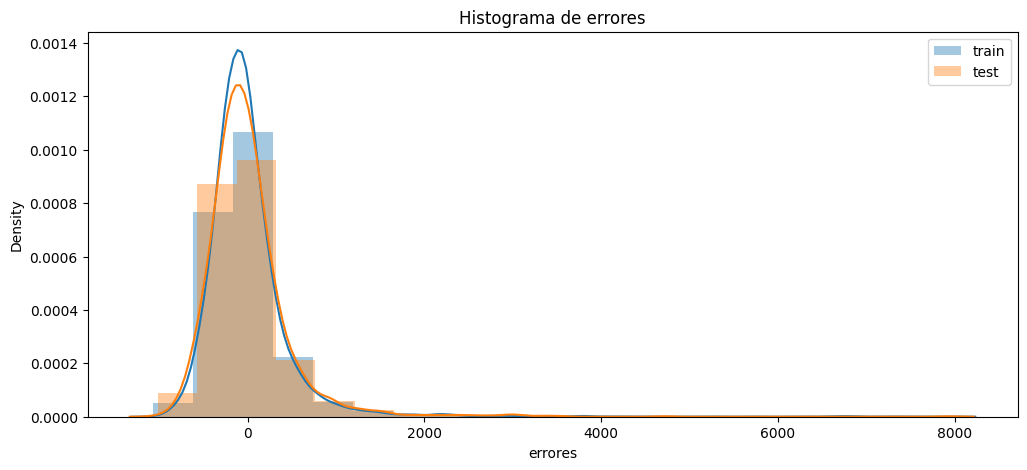

In [53]:
plt.figure(figsize = (12,5))
plt.title('Histograma de errores')
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train') # kde = True, para que nos grafique la curva de densidad de probabilidad
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test') # kde = True, para que nos grafique la curva de densidad de probabilidad
plt.xlabel('errores')
plt.legend()
plt.show()

Si recordamos la distribución de los datos de la variable respuesta, vemos que existen numerosos valores atípicos. Estos valores pueden estar ocasionando que se sesgue la estimación de los coeficientes del modelo y por lo tanto no se refleje la relación general entre las variables. Los outliers pueden explicar además el MSE alto y el bajo R2 (la baja precisión). Para poder cumplir con el objetivo se predecir el ingreso planteamos:
   * Eliminar los outliers
   * Realizar una transformación de la variable (con potencia ya que la distribución esta sesgada a la derecha) para reducir el efecto de los outliers  
   * Creación de una nueva variable de ingresos categórica que agrupe a los registros en categorías como: ingreso cero, ingreso bajo, ingreso medio, ingreso alto  

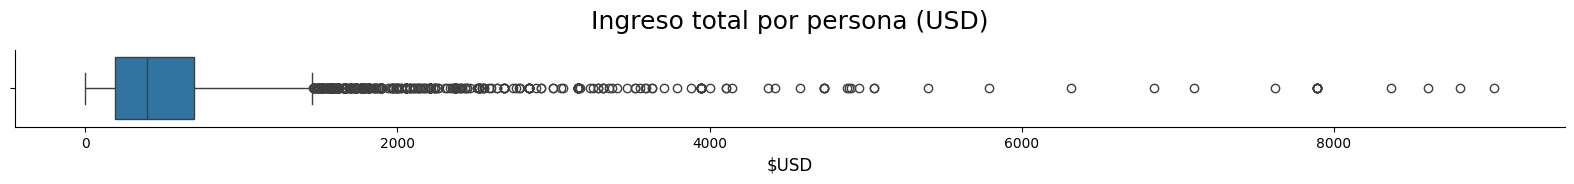

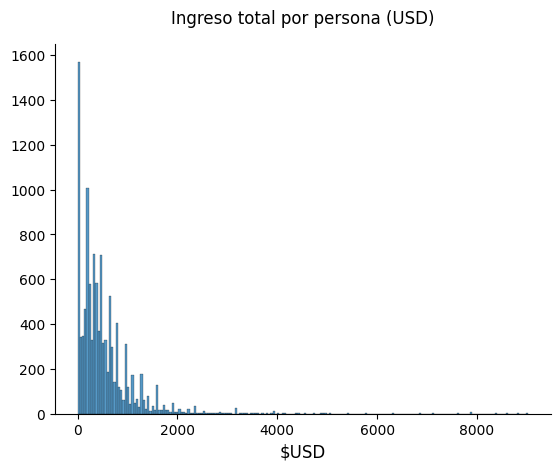

In [54]:
plt.figure(figsize=(20, 1)) # tamaño de figura

# Subgráfico 1
totales = sns.boxplot(x="ingresos_totales_USD", data=datosadultos)
plt.title('Ingreso total por persona (USD)', size=18, pad=15)
plt.xlabel('$USD', size=12)
plt.ylabel('', size=12)
sns.despine()
plt.show()

totales2 = sns.histplot(x="ingresos_totales_USD", data=datosadultos)
plt.title('Ingreso total por persona (USD)', size=12, pad=15)
plt.xlabel('$USD', size=12)
plt.ylabel('', size=12)
sns.despine()
plt.show()

## Modelo 2. Con transformación de la variable

In [55]:
# Transformar los datos usando la raíz cuadrada
#Selección de la variable objetivo
ysq = np.sqrt(datosadultos['ingresos_totales_USD'])

#Selección de las variables predictoras
xsq =  np.sqrt(datosadultos[[ 'dominio', 'edad',
       'parentesco_jefe', 'situacion_conyugal', 
       'estado_ocupacional', 'cat_ocupacional', 'nivel_max_educativo', 'años_escolaridad',
       'lugar_nacimiento', 'cantidad_hijos_nac_vivos','hijos_nacidos_vivos_Si',
        'sexo_Mujer']])


In [56]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(xsq, ysq, test_size=0.2, random_state=42)

In [57]:
# Ajustar el modelo de regresión lineal
mo1 = LinearRegression()
mo1.fit(X_train, y_train)

LinearRegression()

In [58]:
# Hacer predicciones
y_train_pred = mo1.predict(X_train) # subset de entrenamiento
y_test_pred = mo1.predict(X_test) #subset de testeo

# Calcular los residuos
residuos = y_test - y_test_pred

## Evaluación del modelo 2 de regresión

In [59]:
# Métricas del modelo 
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print(f'Mean Squared Error: {round(mse,2)}')
print(f'R-squared: {round(r2,2)}')

# Métricas del modelo training
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)
print(f'Mean Squared Error train: {round(mse,2)}')
print(f'R-squared train: {round(r2,2)}')

Mean Squared Error: 81.98
R-squared: 0.41
Mean Squared Error train: 77.07
R-squared train: 0.44


In [60]:
# Obtenemos los componentes de nuestro regresor. A diferencia del regresor con un solo atributo, aquí tenemos dos pendientes
print('Las pendientes del modelo de regresión lineal son:', mo1.coef_)
print('La ordenada al origen del modelo de regresión lineal es:', mo1.intercept_)

Las pendientes del modelo de regresión lineal son: [-1.83314485  2.53695739  1.38535897  0.03719063 11.62585176 -2.14027171
  1.85219864  5.10106051 -0.01838305 -0.29530674 -0.36591312 -2.62099466]
La ordenada al origen del modelo de regresión lineal es: -30.478803981273742


<Figure size 1000x500 with 0 Axes>

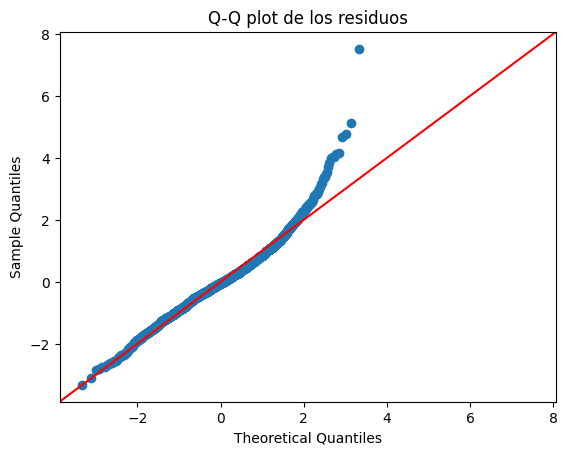

In [61]:
# Evaluar la normalidad con un Q-Q plot
plt.figure(figsize=(10, 5))
sm.qqplot(residuos, line='45', fit=True)
plt.title('Q-Q plot de los residuos')
plt.show()

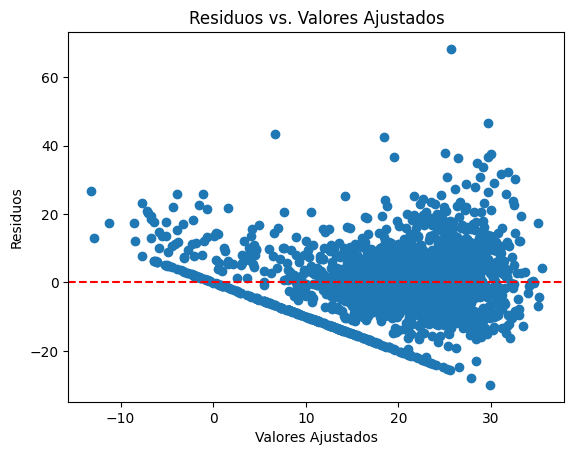

In [62]:
# Evaluar la homogeneidad de varianzas con un gráfico de residuos vs. valores ajustados
plt.scatter(y_test_pred, residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuos vs. Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.show()

C:\Users\Caucota\AppData\Local\Temp\ipykernel_10140\101886520.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_train_pred, bins = 20, label = 'train') # kde = True, para que nos grafique la curva de densidad de probabilidad
C:\Users\Caucota\AppData\Local\Temp\ipykernel_10140\101886520.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/

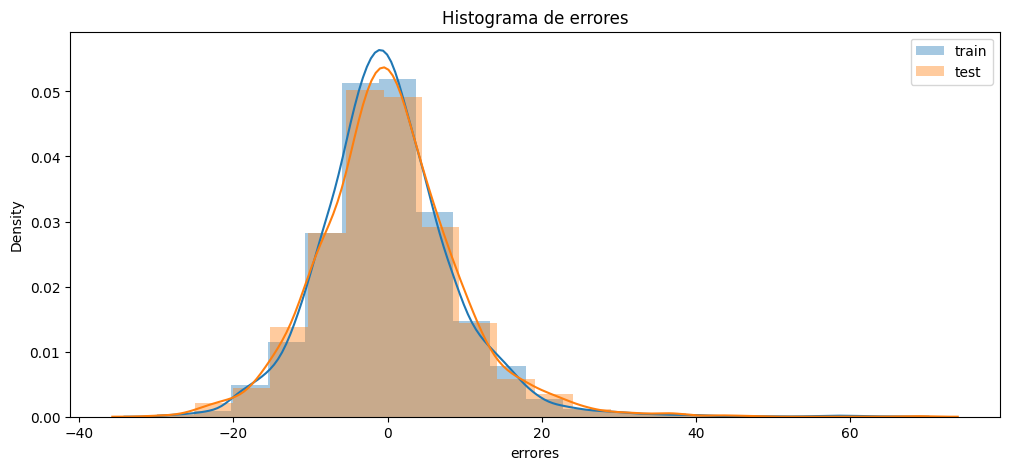

In [63]:
plt.figure(figsize = (12,5))
plt.title('Histograma de errores')
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train') # kde = True, para que nos grafique la curva de densidad de probabilidad
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test') # kde = True, para que nos grafique la curva de densidad de probabilidad
plt.xlabel('errores')
plt.legend()
plt.show()

El modelo mejoró en la precisión pero siguen existiendo problemas de homogeneidad de las varianzas

## Algoritmo de clasificación - Random Forest

#### Creamos una nueva variable en el data frame con intervalos del mismo largo

Si tenemos en cuenta los ingresos mensuales aproximados por persona individual por estrato económico estimados para CABA en el 2024 (transformados a USD) podemos realizar la siguiente clasificación:   

Ingresos por estrato:
   - 0-190 USD indigencia
   - 190-430 USD pobreza
   - 430-1700 USD clase media 
   - ->1700 USD clase acomodada   
       
Las categorías y sus valores podrían ser:
   * Ingreso nulo = 0
   * Ingreso muy bajo o nulo = (0,190]
   * Ingreso bajo (190,430]
   * Ingreso medio (430,1700]
   * Ingreso alto >1700



In [64]:
# Función para clasificar los sueldos
def clasificar_ingreso(ingreso):
    if ingreso == 0:
        return 'Ingreso nulo'
    elif 0 < ingreso <= 190:
        return 'Ingreso muy bajo'
    elif 190 < ingreso <= 430:
        return 'Ingreso bajo'
    elif 430 < ingreso <= 1700:
        return 'Ingreso medio'
    else:
        return 'Ingreso alto'

# Crear la nueva columna 'categoria'
datosadultos.loc[:,'ingresos_totales_USD_cat'] = datosadultos.loc[:,'ingresos_totales_USD'].apply(clasificar_ingreso)

C:\Users\Caucota\AppData\Local\Temp\ipykernel_10140\1826299419.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datosadultos.loc[:,'ingresos_totales_USD_cat'] = datosadultos.loc[:,'ingresos_totales_USD'].apply(clasificar_ingreso)


In [65]:
datosadultos['ingresos_totales_USD_cat'].value_counts()

ingresos_totales_USD_cat
Ingreso medio       4723
Ingreso bajo        2975
Ingreso muy bajo    1794
Ingreso nulo        1363
Ingreso alto         399
Name: count, dtype: int64

## Random Forest 

In [66]:
#Selección de la variable objetivo
y = datosadultos['ingresos_totales_USD_cat']

#Selección de las variables predictoras
x =  datosadultos[[ 'dominio', 'edad',
       'parentesco_jefe', 'situacion_conyugal', 
       'estado_ocupacional', 'cat_ocupacional', 'nivel_max_educativo', 'años_escolaridad',
       'lugar_nacimiento', 'cantidad_hijos_nac_vivos','hijos_nacidos_vivos_Si',
        'sexo_Mujer']]

### Separando Train /Test

In [67]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [68]:
y_test

10259        Ingreso bajo
8741     Ingreso muy bajo
1854        Ingreso medio
13921    Ingreso muy bajo
11231       Ingreso medio
               ...       
7150         Ingreso nulo
14202        Ingreso bajo
11364    Ingreso muy bajo
1684         Ingreso bajo
5645        Ingreso medio
Name: ingresos_totales_USD_cat, Length: 2251, dtype: object

### Entrenando el modelo 

In [69]:
# Crear y entrenar el modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predecir con el modelo Random Forest
y_pred_rf = rf.predict(X_test)

# Evaluación del modelo Random Forest
print("Evaluación del modelo Random Forest")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))

# Importancia de las características
importances = rf.feature_importances_
feature_names = x.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)

Evaluación del modelo Random Forest
Confusion Matrix:
 [[  9   6  75   3   0]
 [  1 255 237  82  10]
 [ 26 193 696  41  12]
 [  1 124  65 113  53]
 [  0  17  18  31 183]]
Classification Report:
                   precision    recall  f1-score   support

    Ingreso alto       0.24      0.10      0.14        93
    Ingreso bajo       0.43      0.44      0.43       585
   Ingreso medio       0.64      0.72      0.68       968
Ingreso muy bajo       0.42      0.32      0.36       356
    Ingreso nulo       0.71      0.73      0.72       249

        accuracy                           0.56      2251
       macro avg       0.49      0.46      0.47      2251
    weighted avg       0.54      0.56      0.55      2251

Accuracy Score: 0.5579742336739227
Feature Importances:
 edad                        0.351526
años_escolaridad            0.122626
lugar_nacimiento            0.092799
situacion_conyugal          0.077160
parentesco_jefe             0.071364
estado_ocupacional          0.062837
n

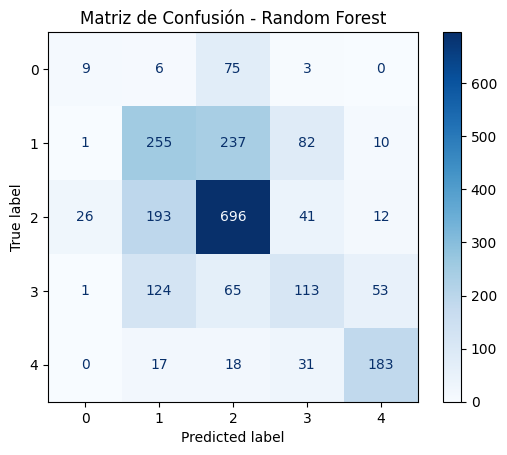

In [70]:
# Matriz de Confusión para Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - Random Forest')
plt.show()

# KNN

In [71]:
# Crear y entrenar el modelo Random Forest
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predecir con el modelo Random Forest
y_pred_knn = knn.predict(X_test)

# Evaluación del modelo Random Forest
print("Evaluación del modelo KNN")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Accuracy Score:", accuracy_score(y_test, y_pred_knn))

Evaluación del modelo KNN
Confusion Matrix:
 [[  6   4  80   2   1]
 [  5 285 232  56   7]
 [ 29 233 681  20   5]
 [  1 150  89  72  44]
 [  1  37  65  35 111]]
Classification Report:
                   precision    recall  f1-score   support

    Ingreso alto       0.14      0.06      0.09        93
    Ingreso bajo       0.40      0.49      0.44       585
   Ingreso medio       0.59      0.70      0.64       968
Ingreso muy bajo       0.39      0.20      0.27       356
    Ingreso nulo       0.66      0.45      0.53       249

        accuracy                           0.51      2251
       macro avg       0.44      0.38      0.39      2251
    weighted avg       0.50      0.51      0.50      2251

Accuracy Score: 0.5131052865393159


### Ajuste de hiperparámetros KNN

Evaluamos cómo cambia el rendimiento del clasificador KNN al variar el número de vecinos. Utilizamos los resultados para seleccionar el número óptimo de vecinos para el clasificador.

In [72]:
ACC_train = []
ACC_test = []
vecinos = [1, 3, 5, 10, 15, 20, 25, 30]
for n in vecinos:
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    ACC_train.append(train_acc)
    y_test_pred = clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    ACC_test.append(test_acc)

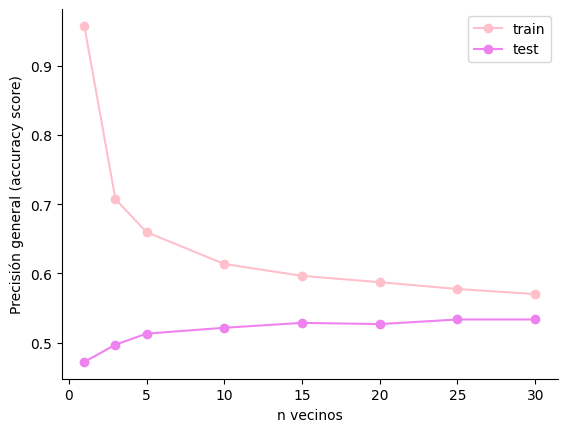

In [73]:
plt.plot(vecinos,ACC_train,'o-',label='train', color='pink')
plt.plot(vecinos,ACC_test,'o-',label='test', color='violet')
plt.xlabel('n vecinos')
plt.ylabel('Precisión general (accuracy score)')
plt.legend()
sns.despine();

In [74]:
#Elejimos 20,25 y 30 como mejores vecinos
# Valores para los parametros a optimizar
param_grid_vec = {
    'n_neighbors': [20, 25, 30],
    'weights': ['uniform','distance'],
    'metric': ['euclidean', 'manhattan'],
}

In [75]:
# Definir el estimador kNN
knn_search = KNeighborsClassifier()

In [76]:
# Configurar GridSearchCV
vecinos_search = GridSearchCV(estimator=knn_search, param_grid=param_grid_vec,
                         cv=3, verbose=2, n_jobs=-1)

In [77]:
vecinos_search.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [20, 25, 30],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [78]:
# Mejores hiperparametros
vecinos_search.best_params_

{'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'uniform'}

In [79]:
knn_best = KNeighborsClassifier(metric='manhattan', n_neighbors=20, weights='uniform')

In [80]:
#Ajustamos modelo con mejoresd hiperparámetros
knn_best.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=20)

In [81]:
new_predictions = knn_best.predict(X_test)

In [82]:
# Evaluación del modelo KNN
print("Evaluación del modelo KNN")
print("Confusion Matrix:\n", confusion_matrix(y_test,  new_predictions))
print("Classification Report:\n", classification_report(y_test,  new_predictions))
print("Accuracy Score:", accuracy_score(y_test,  new_predictions))


Evaluación del modelo KNN
Confusion Matrix:
 [[  1   1  89   2   0]
 [  0 259 279  41   6]
 [  2 183 766  12   5]
 [  0 147  90  61  58]
 [  0  31  61  23 134]]
Classification Report:
                   precision    recall  f1-score   support

    Ingreso alto       0.33      0.01      0.02        93
    Ingreso bajo       0.42      0.44      0.43       585
   Ingreso medio       0.60      0.79      0.68       968
Ingreso muy bajo       0.44      0.17      0.25       356
    Ingreso nulo       0.66      0.54      0.59       249

        accuracy                           0.54      2251
       macro avg       0.49      0.39      0.39      2251
    weighted avg       0.52      0.54      0.51      2251

Accuracy Score: 0.5424255886272767


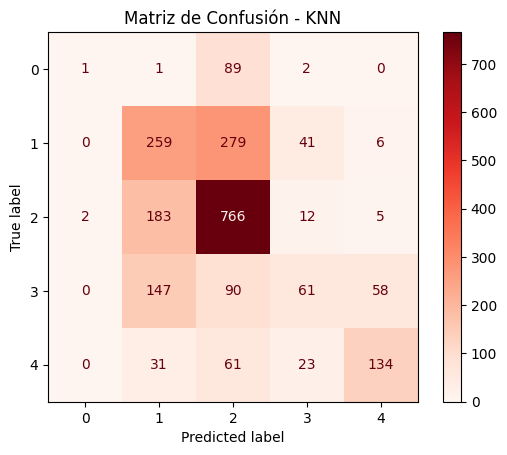

In [83]:
random_confusion = confusion_matrix(y_test, new_predictions)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=random_confusion)
disp_knn.plot(cmap=plt.cm.Reds)
plt.title('Matriz de Confusión - KNN')
plt.show()

##  Conclusión

**R2 - Modelos de regresión:** El modelo de regresión lineal 1 presenta un R cuadrado bajo 0.29 que puede ser debido a la presencia de outliers. La transformación de la variable mejora la performance con un R cuadrado de 0.41. Sin embargo, sigue explicando un pocentaje bajo de la variabilidad de los datos. Observamos que los modelos no cumplen los supuestos de normalidad y homogeneidad de varianzas.
**Algoritmos de clasificación:** Si bien las variable respuesta creada es diferente a la variable de ingresos cuantitiativa inicial, nos permitió analizar nuestro objetivo (predecir el ingreso de una persona). Los modelos de clasificación presentaron una presición general similar, la de Random Forest fue de 0.56 y la del algoritmo KNN 0.54. Los valores de precisión y de recall para ambos modelos fueron similares, y demuestran que ambos modelos son buenos prediciendo para las categorías de ingresos medios y nulos.

*Dado que el modelo Random Forest tiene una mayor precisión general y mejores resultados que el KNN y los modelos de regresión lineal, se puede concluir que el modelo Random Forest es el mejor.*